# INF200 Lecture No 8

### 5 November 2018

## Today's topics

1. Scientific Python II
    - NumPy
    - Matplotlib
1. Case Studies
    - Visualizing data
    - Illustrating the bisection method
    - Planetary motion
    - Markov chain analysis of Chutes & Ladders

### NumPy: Computing with Arrays

- Python lists can contain "anything"
    - Flexible, but requires much space and time
- NumPy
    - Arrays containing a *fixed number* of elements of *the same data type*
    - Compact and efficient storage
    - Many mathematical operations can be applied to entire array

In [1]:
import numpy as np
import math

In [2]:
x = np.array([0, 1., 2, 3, 4, 5, 6])
3 * x + 2

array([ 2.,  5.,  8., 11., 14., 17., 20.])

### Array properties
- `ndim`: number of dimensions
- `size`: total number of elements
- `shape`: rows, columns, ...
- `dtype`: data type of elements
- `nbytes`: number of bytes occupied by data

In [3]:
print('x.ndim  :', x.ndim)
print('x.size  :', x.size)
print('x.shape :', x.shape)
print('x.dtype :', x.dtype)
print('x.nbytes:', x.nbytes)

x.ndim  : 1
x.size  : 7
x.shape : (7,)
x.dtype : float64
x.nbytes: 56


##### Example: 2-dim array of 8-bit integers

In [4]:
i8 = np.array([[10, 20], [-10, -20], [127, 220]], dtype=np.int8)
i8

array([[ 10,  20],
       [-10, -20],
       [127, -36]], dtype=int8)

In [5]:
print('i8.ndim  :', i8.ndim)
print('i8.size  :', i8.size)
print('i8.shape :', i8.shape)
print('i8.dtype :', i8.dtype)
print('i8.nbytes:', i8.nbytes)

i8.ndim  : 2
i8.size  : 6
i8.shape : (3, 2)
i8.dtype : int8
i8.nbytes: 6


- Note: The entry value `220` has been wrapped into the value range `-128..127` of 8-bit integers


### Creating Arrays

#### Numbers with fixed spacing: `linspace(a, b)`
- Creates array with 50 numbers from $a$ to $b$
- Both $a$ and $b$ er included
- Fixed interval between numbers: $(b-a)/49$
- You get an array with 100 numbers using `linspace(a, b, num=100)`

In [6]:
np.linspace(1, 50)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [7]:
np.linspace(0, 1, num=11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

#### Numbers with logarithmic spacing: `logspace(a, b)`

- Creates array with 50 numbers from $10^a$ to $10^b$
- Both $10^a$ and $10^b$ are included
- Logarithmic distance between numbers (fixed factor)

In [8]:
np.logspace(-1, 1, num=10)

array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])

#### Some other functions generating arrays

- take shape as first argument, data type is optional (default is `float`)
- `zeros()`: array of zeros of given size
- `ones()`: array of ones of given size
- `empty()`: array with uninitialized data
- `arange()`: similar to range, really useful only for arrays of integers
- `*_like()`: create array with same shape as argument

In [9]:
np.ones((3, 2, 4), dtype=complex)

array([[[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]],

       [[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]],

       [[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]]])

In [10]:
np.empty(10)

array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])

- Note that the content if an array created with `empty()` is entirely unpredictable!

### Working with data in multiple dimension

- We will stick to one and two dimensions here
- Key concepts:
    - Operations are applied element-wise if both operands have same size
    - Otherwise, NumPy attempts to *broadcast*
        - The smaller operand is replicated as many times as necessary to create an array that matches the larger operand
        - The operation is then applied element-wise

#### Example: array and array of same size

In [11]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[10, 20], [30, 40], [50, 60]])
print(a)
print(b)
print(a+b)

[[1 2]
 [3 4]
 [5 6]]
[[10 20]
 [30 40]
 [50 60]]
[[11 22]
 [33 44]
 [55 66]]


In [12]:
a * b

array([[ 10,  40],
       [ 90, 160],
       [250, 360]])

- Note: Element-wise multiplication, not matrix multiplication in mathematical sense!

##### Mathematical matrix-matrix/matrix-vector multiplication

- Available in Python 3.5 and later

In [13]:
a @ b

ValueError: shapes (3,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [14]:
a @ b.T

array([[ 50, 110, 170],
       [110, 250, 390],
       [170, 390, 610]])

#### Example: array and scalar

In [15]:
a + 100

array([[101, 102],
       [103, 104],
       [105, 106]])

#### Example: 2D- and 1D arrays

In [16]:
c = np.array([100, 200])
c

array([100, 200])

In [17]:
a + c

array([[101, 202],
       [103, 204],
       [105, 206]])

- `c` has been added to each row of `a`
- What happens for 3-element array?

In [18]:
d = np.array([10, 20, 30])
d

array([10, 20, 30])

In [19]:
a + d

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

- NumPy sees `d` as 1x3 vector, so shape does not fit
- Need to transpose first!
- But because `d` has only one dimension, transposing it has no effect

In [20]:
d.T

array([10, 20, 30])

- We need to define a two-dimensional array that has one row and three columns (note the extra brackets!)
- That can be transposed

In [21]:
dd = np.array([[10, 20, 30]])
dd

array([[10, 20, 30]])

In [22]:
dd.T

array([[10],
       [20],
       [30]])

In [23]:
a + dd.T

array([[11, 12],
       [23, 24],
       [35, 36]])

### Indexing arrays

- We can access array elements as for mathematical matrices
- In Python, indices run from 0, not from 1
- The first index indicates the row, the second the column

In [24]:
print(a)

[[1 2]
 [3 4]
 [5 6]]


In [25]:
print(a[0, 0])

1


In [26]:
print(a[1, 0])

3


### Slicing of arrays

- One is often interested in picking out a subset of elements, eg a column
- This is called *slicing*

#### Slicing of one-dimensional arrays

- We define an array for illustration

In [27]:
a = np.linspace(10, 100, num=10)
a

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

- `a[m:n]` give us an array with elements
    - from and including index `m`
    - to but **excluding** index `n`
    - same logic as for `range()`: stop-index is not included
    - total number of elements selected: `n-m`

In [28]:
a[2:4]

array([30., 40.])

- `a[m:n:s]` gives us an array with elements
    - from and including index `m`
    - to but excluding index `n`
    - with **step** `s`
    - i.e. `a[m], a[m+s], a[m+2*s], ...`

In [29]:
a[1:8:2]

array([20., 40., 60., 80.])

- We can drop `m`, `n`, or both if we want to start from the first or go through the last element

In [30]:
a[::2]

array([10., 30., 50., 70., 90.])

### Arrays vs Lists

- NumPy arrays differ in several ways from Python lists, especially
    - arrays have fixed size
    - all entries in an array have the same data type (exceptions apply)
- This makes arrays much more efficient in time and space than lists

##### Array with 1.000.000 entries

In [31]:
lx = [x for x in range(0, 1000000)]
ax = np.array(lx)

In [32]:
%timeit sinlx = [math.sin(x) for x in lx]

180 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%timeit sinax = np.sin(ax)

18.1 ms ± 349 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- NumPy is significantly faster than list comprehension
- This applies mainly when we apply NumPy functions to large arrays

#### Arrays slices are view: An important difference from lists

- See also [Copies and Views Tutorial](http://scipy-lectures.github.io/intro/numpy/array_object.html#copies-and-views)
- Array slices are so-called *views*:
    - If `a` is a Numpy array, and `b = a[m:n:s]`, then `b` is a *view* of array `a`
    - `a` and `b` are distinct objects (i.e., `id(a) != id(b)`)
    - `a` and `b` are both of type `numpy.ndarray`
    - `a` and `b` ***share the same underlying data***: `b` just restricts what we see of the data in `a`
    - Therefore, any change to data in `b` also affects data in `a`

In [34]:
print(a)
b = a[:4]
b[0] = 1000
print(a)

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[1000.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


**Note**: 

- For a normal Python *list* `l`, `l[:]` is a *copy*  of the elements in `l`, i.e., a new list object, that can be manipulated without affecting `l`. 
- For an array `a`, `a[:]` is a *view* of `a` with the same underlying data as `a` and changing data through this view *will change* the data in `a`.

#### Slicing of two-dimensional arrays

- Same logic as for one-dimensional arrays
- We define an array for illustration

In [35]:
b = np.array([[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34]])
b

array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34]])

- b[:, k] gives us the column with index `k`
- even though we choose a column, we it is displayed as a row: PyLab just sees it as a one-dimensional array

In [36]:
b[:, 1]

array([12, 22, 32])

- `b[r, :]` gives us the row with index `r`

In [37]:
b[0, :]

array([11, 12, 13, 14])

- If we want several rows of columns, we proceed as for one-dimensional arrays
- We get at two-dimensional arrays as result

In [38]:
b[:, :2]    # the first two columns

array([[11, 12],
       [21, 22],
       [31, 32]])

In [39]:
b[:, ::2]   # every other column

array([[11, 13],
       [21, 23],
       [31, 33]])

- We can slice rows and columns simultaneously

In [40]:
b[1:, ::2]

array([[21, 23],
       [31, 33]])

### Matplotlib

- Currently the most widely used plotting package for scientific Python
- Many other graphics packages build on it
- See
    - https://matplotlib.org
    - https://matplotlib.org/gallery/index.html
    - http://www.labri.fr/perso/nrougier/teaching/matplotlib/
- Two different approaches
    - scripting style
    - object-oriented style
- We will look at the scripting style first

#### Configuration

- For use in Jupyter notebook, we configure matplotlib to create inline figures
- We also set a quite wide and low figure format
- Must set format after `%matplotlib inline` magic, because magic sets format

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

Set figure size to suitable format for notebook
- Must come in separate cell after the `%matplotlib inline` cell

In [42]:
plt.rcParams['figure.figsize'] = (12, 5)

##### rcParams shows all configurable parameters

In [43]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

#### Examples

##### Single function, default style

- `;` after last line to suppress output of `__repr__` of return value of last command

In [44]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
plt.plot(x, y);

- We can use [$\LaTeX$](http://no.wikipedia.org/wiki/LaTeX) formatting for nicer figure labels
- Strings with $\LaTeX$ codes should be raw strings, so that backslashes cause no problems

In [45]:
plt.rcParams['text.usetex'] = True

plt.plot(x, np.sin(x)**2, 'o-', label=r'$\sin^2(x)$');
plt.plot(x, np.sqrt(1+np.cos(x)), 's--', label=r'$\sqrt{1+\cos(x)}$');
plt.legend();
plt.xlabel('$x$');
plt.ylabel('$y(x)$');
plt.title('Trigonometric functions');
plt.xticks(np.linspace(0, 2, 9) * np.pi,
           ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{2}$', r'$\pi$',
            r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']);
plt.xlim(0, 2*np.pi);
plt.ylim(-0.05, 1.5);

plt.savefig('trigfuncs.png');
plt.savefig('trigfuncs.pdf');

##### Output to file

- Generally prefer vector graphics: 'pdf', 'svg'
- In some cases raster graphics (`png`, `gif`) may be useful, but they incur a loss of quality
- `jpg` is *not* a suitable format for line graphics
- `savefig` must be called in same notebook cell as plot commands!

#### Object-oriented Matplotlib

- Generally recommended, especially in larger scripts
- Allows for more control, since we handle objects in graphic explicitly

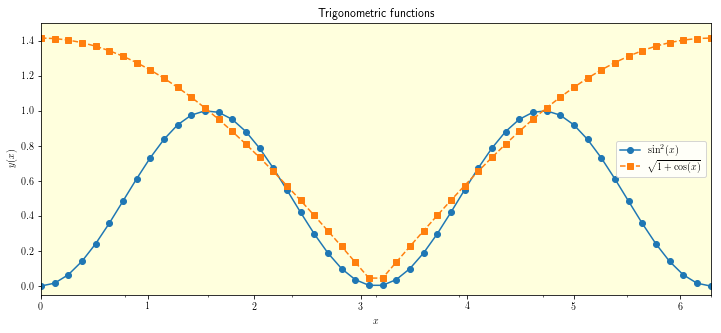

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor='#ffffdd')

line1 = ax.plot(x, np.sin(x)**2, 'o-', label=r'$\sin^2(x)$');
line2 = ax.plot(x, np.sqrt(1+np.cos(x)), 's--', label=r'$\sqrt{1+\cos(x)}$');
ax.legend();
ax.set_xlabel('$x$');
ax.set_ylabel('$y(x)$');
ax.set_title('Trigonometric functions');
ax.set_xticks(np.linspace(0, 2, 9) * np.pi,
           ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{2}$', r'$\pi$',
            r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']);
ax.set_xlim(0, 2*np.pi);
ax.set_ylim(-0.05, 1.5);

fig.savefig('trigfuncs_oo.pdf');

Turn off $\LaTeX$ again

In [47]:
plt.rcParams['text.usetex'] = False

### Do not trust figures blindly, evaluate them critically!

#### What is wrong with this figure?

In [48]:
x = np.linspace(0, 300)
plt.plot(x, np.cos(x));

- Note the $x$-axis: it ranges from 0 to 300
- The figure thus cannot show the normal cosine, which has a period from $0$ to $2\pi$
- We plot the same function again, but with higher resolution along the $x$-axis

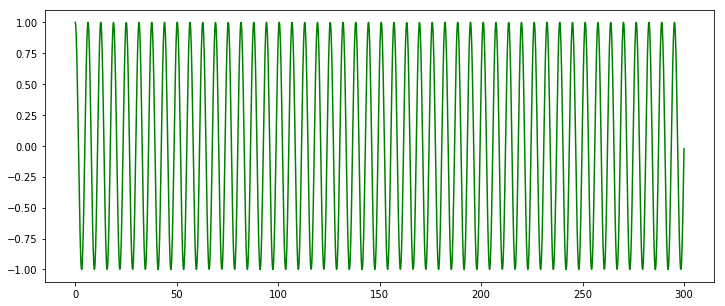

In [49]:
xh = np.linspace(0, 300, num=2000)
plt.plot(xh, np.cos(xh), 'g-');

- We see that there are very many periods of the cosine (to be precise $300/(2\pi)\approx 48$)
- `linspace(0, 300)` has given us only 50 data points along the $x$-axis
- We have drawn only **a single data point per period** in the first figure
- To see this more clearly, we plot the cosine again with few and many points, but only up to 60

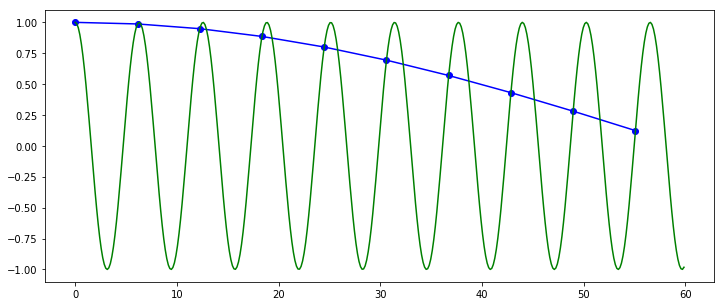

In [50]:
plt.plot(x[x<60], np.cos(x[x<60]), 'bo-')
plt.plot(xh[xh<60], np.cos(xh[xh<60]), 'g-');

In [51]:
len(x)

50

- The green line shows the correct cosine function
- The blue dots show the data points we used for plotting the first figure
- The blue line connects the blue dots and is the line we saw in the first figure

#### Take-home message: Computers are eminently suited to generate nonsense---you have to use your critical mind!!!

* * *

## Visualization and analysis of data
    
### Data we will use
- Temperature and radiation data from [NMBU's weather station at Søråsfeltet](http://www.nmbu.no/fagklim/)
    - Basic Data: `Data til INF100 2003-2012.xlsx`
    - Thanks to Arne Auen Grimenes and Signe Kroken for the data!
    - The spreadsheet looks like this (one tab per year)

<img src="INF100_F05_Excel.png">    

- Note the following
    - one row per day (24 hours)
    - the first row contains column headers
    - dates are given in continental European format
    - data is missing in some cells
    - numerical values are given with decimal *comma*
- Spreadsheets can be read directly (module `xlrd` or `pandas`): next week
- We store the spreadsheet as "csv" (*comma-separated values*) file and fix it, proceeding as follows
    1. Create a copy of the spreadsheet
    1. Delete all columns lacking data or unwanted for other reasons
    1. Save as csv-file
    1. Edit the csv-file in a text editor
        1. Add `#` to the beginning of the first line to make it a comment
        1. Use Find-Replace to replace all `,` with `.`
        1. Save the file
- I have prepared `weather_umb_2012.csv` this way
- The first few lines are

<img src="INF100_F05_CSV.png">

### Reading data into Python

- We can read data from a text file using `loadtxt()`

#### First attempt

In [52]:
try:
    weather = np.loadtxt('weather_umb_2012.csv', 
                         skiprows=1,
                         delimiter=';')
except ValueError as e:
    print('Loading failed:', e)

Loading failed: 'utf-8' codec can't decode byte 0xa1 in position 25: invalid start byte


#### Second attempt

- File contains special characters
- Need to open file explicitly with proper encoding

In [53]:
try:
    with open('weather_umb_2012.csv', mode='r', encoding='latin-1') as data:
        weather = np.loadtxt(data, 
                             skiprows=1,
                             delimiter=';')
except ValueError as e:
    print('Loading failed:', e)

Loading failed: could not convert string to float: '01.01.2012'


#### Third attempt

- Explicitly convert dates in column 0
- The parser in `loadtxt()` returns each entry in the table as a `bytes` object
- Since `datestr2num` expects as `str` object, we need to convert `bytes` object `b` into a `str` object by decoding it

In [54]:
from matplotlib import dates

try:
    with open('weather_umb_2012.csv', mode='r', encoding='latin-1') as data:
        weather = np.loadtxt(data, 
                             skiprows=1,
                             delimiter=';',
        converters={0: lambda b: dates.datestr2num(b.decode('latin-1'))})
except ValueError as e:
    print('Loading failed:', e)

- It finally worked!
- Let's plot the temperatures!

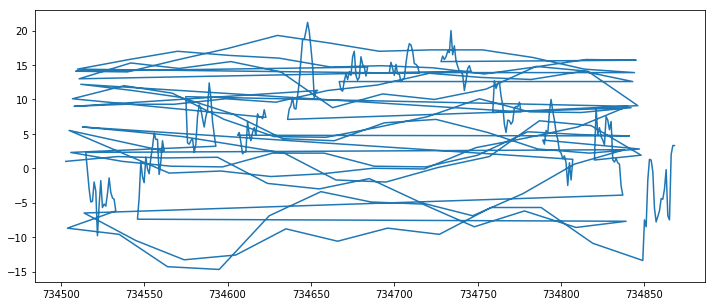

In [55]:
plt.plot(weather[:, 0], weather[:, 1]);

- This look *very* weird!
- Dates are shown as numbers around 734.700
    - Days since 01.01.0001 assuming Gregorian calendar was always used
    - See also [Matplotlib Dates API](https://matplotlib.org/api/dates_api.html)
- Jumps back and forth
- Look at first dates

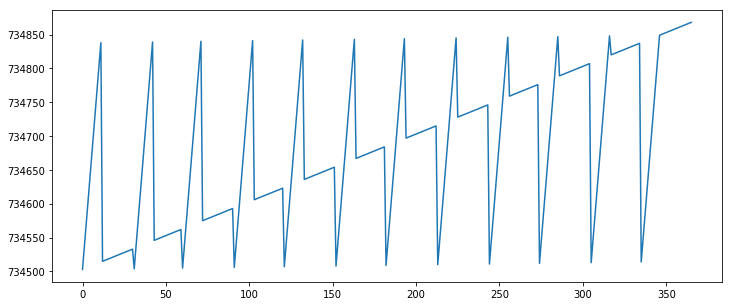

In [56]:
plt.plot(weather[:, 0]);

In [57]:
for j in range(15):
    print('{:>3d}{:>7.0f}{!s:>30s}'.format(j, weather[j, 0],
                                           dates.num2date(weather[j, 0])))

  0 734503     2012-01-01 00:00:00+00:00
  1 734534     2012-02-01 00:00:00+00:00
  2 734563     2012-03-01 00:00:00+00:00
  3 734594     2012-04-01 00:00:00+00:00
  4 734624     2012-05-01 00:00:00+00:00
  5 734655     2012-06-01 00:00:00+00:00
  6 734685     2012-07-01 00:00:00+00:00
  7 734716     2012-08-01 00:00:00+00:00
  8 734747     2012-09-01 00:00:00+00:00
  9 734777     2012-10-01 00:00:00+00:00
 10 734808     2012-11-01 00:00:00+00:00
 11 734838     2012-12-01 00:00:00+00:00
 12 734515     2012-01-13 00:00:00+00:00
 13 734516     2012-01-14 00:00:00+00:00
 14 734517     2012-01-15 00:00:00+00:00


- Dates are increasing by month first
- Only from 13 January, dates increase by day
- Conversion error from US number format!

#### Fourth attempt

- `dates.bytespdate2num` is a *class*
- We call the constructor to create an object that works as a converter function
- Specify date format and file encoding as arguments

In [58]:
try:
    with open('weather_umb_2012.csv', mode='r', encoding='latin-1') as data:
        weather = np.loadtxt(data, 
                             skiprows=1,
                             delimiter=';',
        converters={0: dates.bytespdate2num('%d.%m.%Y', 'latin-1')})
except ValueError as e:
    print('Loading failed:', e)

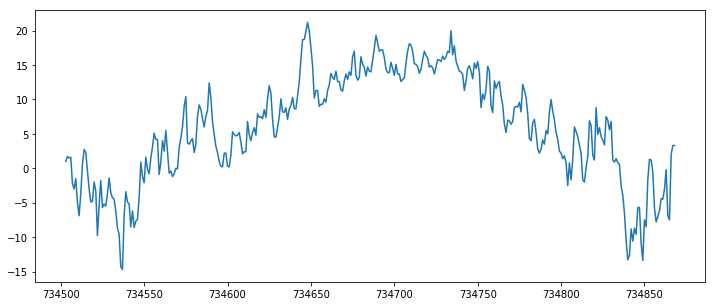

In [59]:
plt.plot(weather[:, 0], weather[:, 1]);

- Finally we have read the data in appearently correct form
- Still sensible to cross-check against data in original file!

#### Plotting with properly formatted dates

In [60]:
plt.plot_date(weather[:, 0], weather[:, 1], '-');
plt.xlabel('Dato');
plt.ylabel('Temperatur [C]');
plt.title('Døgnmiddeltemperatur på Ås 2012');

### A little data analysis

- We will show the daily minimal, average and maximum temperature
- We first assign the pertainign columns to meaningful names to make the code more readable
- We extract the lowest and highest temperatures throughout the year

In [61]:
date = weather[:, 0]
T_avg = weather[:, 1]
T_min = weather[:, 2]
T_max = weather[:, 3]
T_min.min(), T_max.max()

(-21.0, 28.9)

In [62]:
plt.plot_date(date, T_min, '-', label='Daily minimum');
plt.plot_date(date, T_avg, '-', label='Daily average');
plt.plot_date(date, T_max, '-', label='Daily maximum');
plt.xlabel('Day since new year');
plt.ylabel('Temperature [C]');
plt.title('Temperature at Ås in 2012');
plt.ylim(-25, 30);
plt.legend(loc='lower center');

#### Weekly average temperature

- We shall now look at the average temperature per week
- The first week begins Jan 1st, the second Jan 8th, etc
- We include only the 52 complete weeks and drop the last two days of the year
- We first need to create and array with one row per week and seven columns

In [63]:
T_avg_by_week = T_avg[:364].reshape(52, 7)

- What does that line do?
    - `T_avg[:364]` are the first 364 elements in `T_avg` as one-dimensional array
    - `T_avg[:364].reshape(52, 7)` transforms this to a twodimensional array of 52 rows and 7 columns
- To check whether the rows contain the proper data, we compare

In [64]:
print(T_avg[0:7])               # first seven days
print(T_avg_by_week[0, :])      # first row

[ 1.   1.7  1.5  1.6 -2.2 -3.  -1.5]
[ 1.   1.7  1.5  1.6 -2.2 -3.  -1.5]


In [65]:
print(T_avg[7:14])              # second seven days
print(T_avg_by_week[1, :])      # second row

[-5.  -6.9 -3.7  0.6  2.7  2.3 -0.3]
[-5.  -6.9 -3.7  0.6  2.7  2.3 -0.3]


- Look good, so we proceed
- Compute the mean for each week (row)

In [66]:
T_avg_week_mean = T_avg_by_week.mean(axis=1)
date_week_mean = date[:364].reshape(52, 7).mean(axis=1)
len(T_avg_week_mean)

52

- `T_avg_by_weak.mean(axis=1)` computes the mean for each row
    - `axis=1` states that the mean is computed along axis 1, i.e., along the rows (or across the columns)
    - with `axis=0` we would have obtain the means along axis 0, i.e., down the columns (or across the rows)
- We also obtained the centre day of each weak the same way

In [67]:
plt.plot_date(date_week_mean, T_avg_week_mean, '-');

- Now we can plot daily and weekly values in one graph

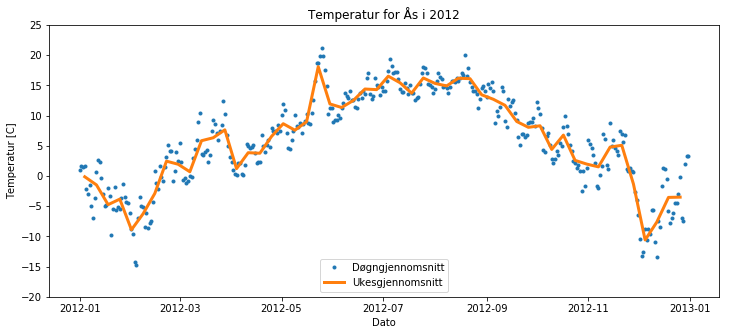

In [68]:
plt.plot_date(date, T_avg, '.', label='Døgngjennomsnitt');
plt.plot_date(date_week_mean, T_avg_week_mean, '-', linewidth=3, label='Ukesgjennomsnitt');
plt.xlabel('Dato');
plt.ylabel('Temperatur [C]');
plt.title('Temperatur for Ås i 2012');
plt.ylim(-20, 25);
plt.legend(loc='lower center');

### Solar irradiation

- We shall now look at solar irradiation, i.e., the energy received from the sunlight over a day, measured in MJ/m$^2$
- We consider the gobal irradiation, including UV, visible and infrared light

In [69]:
e_glob = weather[:, 4]
e_glob.min(), e_glob.max()

(0.18, 27.72)

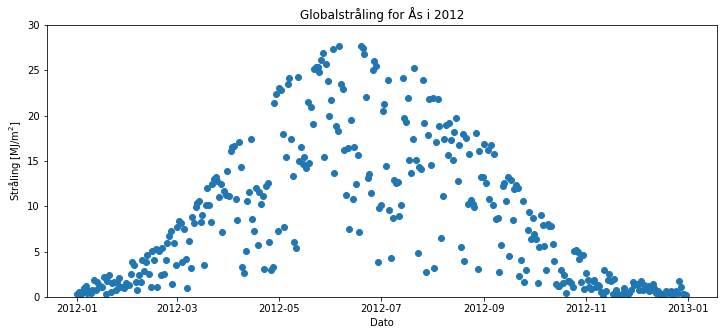

In [70]:
plt.plot_date(date, e_glob, 'o');
plt.xlabel('Dato');
plt.ylabel('Stråling [MJ/m$^2$]');
plt.title('Globalstråling for Ås i 2012');
plt.ylim(0, 30);

#### Analysis of this figure

- The data has a very clear upper envelope
- Below the envelope, values vary much
- Hypothesis:
    - Periodic variation over the year due to the change in earth's position relative to the sun
    - Sine and cosine are the simplest periodic functions
    - Maximum around summer solistice, June 21st
    - Mathematical model
    $$E(d) = a + b \cos\frac{2\pi ( d - d_{max} )}{366}$$
    - where
        - $d$: day of the year
        - $d_{max}$: day of maximal irradiation ($\cos 0=1$)
    - from the figure above we can read of
        - $a\approx 14$
        - $b\approx 14$
    - June 21st is the 173rd day of the year:

In [71]:
d_max = np.array([31, 29, 31, 30, 31, 21]).sum()
d_max

173

- Now we can compute the values for the model and display it together with the data

In [72]:
e_modell_max = 14 + 14 * np.cos(2 * np.pi * (date - date[d_max]) / 366.)
plt.plot_date(date, e_glob, 'o', label='Målinger');
plt.plot_date(date, e_modell_max, '-', linewidth=2, label='Modell');
plt.xlabel('Dato');
plt.ylabel('Stråling [MJ/m$^2$]');
plt.title('Globalstråling for Ås i 2012');
plt.ylim(0, 30);
plt.legend();

- Given the simplicity of the model, it fits surprisingly well
- Can we use the model also for a lower envelope to the data?
- We estimate from the figuren $a'\approx 2$, $b'\approx 2$ for the lower envelope

In [73]:
e_modell_max = 14 + 14 * np.cos(2 * np.pi * (date - date[d_max]) / 366.)
e_modell_min =  2 +  2 * np.cos(2 * np.pi * (date - date[d_max]) / 366.)
plt.plot_date(date, e_glob, 'o', label='Målinger');
plt.plot_date(date, e_modell_max, '-', linewidth=2, label='Modell, max');
plt.plot_date(date, e_modell_min, '-', linewidth=2, label='Modell, min');
plt.xlabel('Dato');
plt.ylabel('Stråling [MJ/m$^2$]');
plt.title('Globalstråling for Ås i 2012');
plt.ylim(0, 30);
plt.legend();

- This fits pretty well, too
- We can draw preliminary conclusions:
    - The annual variation in solar irradiation can be described by a sine function
    - A thick cloud cover reduces irradiation by a factor of seven, approximately
- We need to investigate these preliminary results further, e.g., by looking at several years, other measurements, thorough theoretical analysis, etc

## Plots illustrating the bisection method

This section introduces a plotting function that allows us to create illustrative plots of the bisection method for finding a solution to the equation

$$
f(x) = c
$$

in the interval $[a, b]$, assuming that the equation has exactly one solution in that interval.

We want illustrative plots, so we use [XKCD-style](https://matplotlib.org/examples/showcase/xkcd.html).

In [74]:
def bisect_plot(func, const, a, b, xmin, xmax, lower, left):
    
    with plt.xkcd():
        # evaluate the function across the entire plotting interval
        x = np.linspace(xmin, xmax)
        y = func(x)

        # draw function and constant
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(x, y, '-', lw=3)
        ax.plot([xmin, xmax], [const, const], '-', lw=3)

        # set x-limits, find y-limits
        ax.set_xlim(xmin, xmax)
        ymin, ymax = ax.get_ylim()

        # midpoint
        m = (a + b) / 2.

        # array with x-values just for the half-interval containing the intersection
        if (func(a)-const) * (func(m)-const) < 0:
            x_next = np.linspace(a, m)
        else:
            x_next = np.linspace(m, b)
        y_next = func(x_next)

        # fill the area below the curve in the half-interval containing the intersection
        ax.fill_between(x_next, y_next, ymin, color=(0.8, 1.0, 0.8))

        # draw dashed lines at a, m, b and f(a), f(m), f(b)
        for val, lbl in ((a, 'a'), (m, 'm'), (b, 'b')):
            ax.plot([val, val, xmin], [ymin, func(val), func(val)], 'k--', lw=3)
            ax.text(val, ymin-lower, '${}$'.format(lbl), fontsize='small',
                    horizontalalignment='center',
                    verticalalignment='top')
            ax.text(xmin-left, func(val), '${}({})$'.format(func.__name__, lbl), fontsize='small',
                    horizontalalignment='right',
                    verticalalignment='center')
        ax.text(xmin-left, const, '$c$', fontsize='small',
                horizontalalignment='right',
                verticalalignment='center')

        # we need to reset the vertical limits, text() has changed them
        ax.set_ylim(ymin, ymax)

#### Target function

In [75]:
def f(x):
    return x**2 - 2

#### Illustrate steps of bisection process

- We want to illustrate, so we make plots a little more fun ...

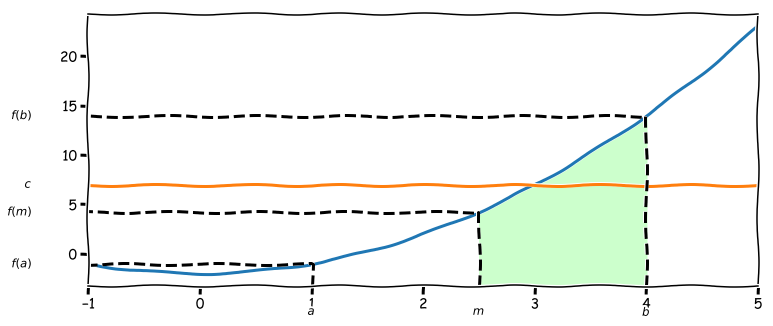

In [76]:
bisect_plot(func=f, const=7, a=1, b=4, xmin=-1, xmax=5, lower=2, left=0.5)

- Proceed into green interval

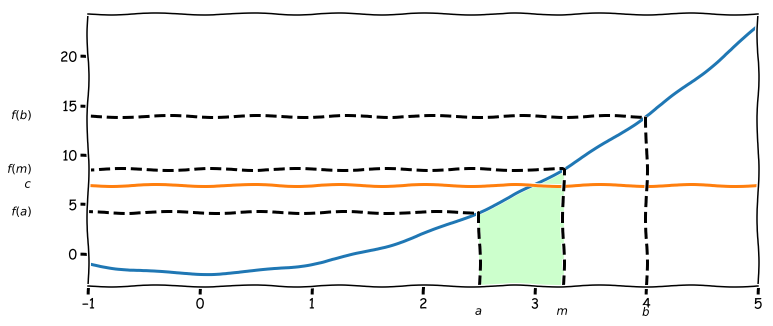

In [77]:
bisect_plot(func=f, const=7, a=2.5, b=4, xmin=-1, xmax=5, lower=2, left=0.5)

- Repeat until $f(m)$ is small enough

In [78]:
bisect_plot(func=f, const=7, a=2.5, b=3.25, xmin=-1, xmax=5, lower=2, left=0.5)

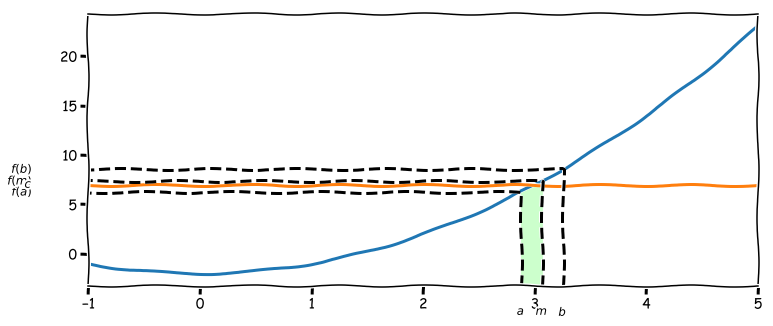

In [79]:
bisect_plot(func=f, const=7, a=2.875, b=3.25, xmin=-1, xmax=5, lower=2, left=0.5)

## 4. Solving differential equations with SciPy

- Simulate a three-body problem of "planets" moving according to Newton's laws
- For simplicity, we let the bodies move in the plane
- Each body is described completely by 
    - its mass $m_j$
    - its position ${\vec{r}}_j = (x_j, y_j)$
    - its velocity $\vec{v}_j = (v_{x, j}, v_{y, j})$
- The total force acting on each body is given by
$$
\vec{F}_j = -\Gamma \sum_{k=j} m_j 	\times m_k 	\times \frac{\vec{r}_j-\vec{r}_k}{\left|\vec{r}_j-\vec{r}_k
\right|^3}
$$
- The acceleration of a body is given by
$$
\vec{a}_j = \frac{\vec{F}_j}{m_j}
$$
- The change in position and velocity is given by
\begin{align}
\dot{\vec{v}}_ j &= \vec{a}_j \\
\dot{\vec{r}}_ j &= \vec{v}_j 
\end{align}

#### Implementation considerations

- SciPy supports integration of ODEs of the form
$$
\vec{y}'(t) = f(\vec{y}, t; parameters)
$$
- $\vec{y}$ is the *state vector* describing the system
- We need to combine all positions and velocities into one vector $\vec{y}$
- Example: three bodies, two dimensions
    - six coordinates (x and y for each of three bodies)
    - six velocity components
    - $\vec{y}$ has 12 dimensions

In [80]:
import scipy.integrate

#### Function computing the derivative

- Form of function prescribed by [scipy.integrate.odeint](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.integrate.odeint.html)
- Set gravitational constant to 1 for convenience

In [81]:
GAMMA = 1    # gravitational constant

def f(y, t, masses):
    n_bodies = len(masses)
    n_coords = len(y) // 2
    n_dim = n_coords // n_bodies
    
    dy = np.zeros_like(y)
    dy[:n_coords] = y[n_coords:]   # velocities: r' = v
    
    r = y[:n_coords].reshape(n_bodies, n_dim) # positions
    a = np.zeros_like(r)   # accelerations
    for body in range(n_bodies):
        for other_body in range(n_bodies):
            if other_body == body:
                continue
            d = r[other_body] - r[body]
            a[body,:] += (GAMMA * masses[other_body]
                          * d * np.dot(d, d)**(-1.5))
    
    dy[n_coords:] = a.reshape(n_coords)   # accelerations: v' = a
    
    return dy

#### Euler integration

- Simplest ODE integration scheme
- Time discretized as $t_k = k \Delta t$
- Update rule
$$
\vec{y}_{k+1} = \vec{y}_k + \Delta t f(\vec{y}_k, t_k)
$$
- The function integrates the ODE from the given initial positions until tmax with time steps dt
- We assume initial velocities zero
- Returns three arrays:
    - positions `r[body, dim, time]`
    - velocities `v[body, dim, time]`
    - time

In [82]:
def planets_euler(masses, r0, dt, tmax):
    n_bodies, n_dim = r0.shape
    n_coords = n_bodies * n_dim

    t = np.arange(0., tmax, dt)
    npoints = len(t)

    y = np.zeros((npoints, 2*n_coords))
    y[0, :n_coords] = r0.reshape(n_coords)
    for n in range(npoints-1):
        y[n+1, :] = y[n, :] + dt * f(y[n, :], n*dt, masses)
        
    r = y[:, :n_coords].T.reshape((n_bodies, n_dim, -1))
    v = y[:, n_coords:].T.reshape((n_bodies, n_dim, -1))
    
    return r, v, t

#### Integration using `odeint` from `scipy.integrate`

- Uses advance ODE integration function
- Takes same input and returns same output as `planets_euler`

In [83]:
def planets_odeint(masses, r0, dt, tmax):
    n_bodies, n_dim = r0.shape
    n_coords = n_bodies * n_dim

    t = np.arange(0., tmax, dt)
    npoints = len(t)

    y0 = np.zeros(2 * n_coords)
    y0[:n_coords] = r0.reshape(n_coords)
    y = scipy.integrate.odeint(f, y0, t, (masses,))
        
    r = y[:, :n_coords].T.reshape((n_bodies, n_dim, -1))
    v = y[:, n_coords:].T.reshape((n_bodies, n_dim, -1))
    
    return r, v, t

#### Simulate example system

- Three bodies in 2-dimensional space

In [84]:
masses = np.array([5., 3., 4.])
r0 = np.array([[1., -1.], [1., 3.], [-2., -1.]])
re, ve, te = planets_euler(masses, r0, 0.001, 10)
ro, vo, to = planets_odeint(masses, r0, 0.001, 10)

#### Plot motions in plane

In [85]:
plt.subplot(1, 2, 1)
for ix, m in enumerate(masses):
    plt.plot(re[ix, 0,:], re[ix, 1, :], lw=2*(m-2))
plt.title('Planetary motion (Euler)')

plt.subplot(1, 2, 2)
for ix, m in enumerate(masses):
    plt.plot(ro[ix, 0,:], ro[ix, 1, :], lw=2*(m-2))
plt.title('Planetary motion (odeint)');

- Signficantly different
- Which one is correct?

#### Calculation of total energy in systems

In [86]:
def total_energy(r, v, masses):
    n_bodies, n_dim, n_t = r.shape
    energy = np.zeros(n_t)
    
    for n in range(n_t):
        for body in range(n_bodies):
            energy[n] = (0.5 * masses[body] 
                         * v[body, :, n].T @ v[body, :, n])

            for other_body in range(n_bodies):
                if other_body == body:
                    continue
                d = r[other_body, :, n] - r[body, : , n]
                energy[n] += (GAMMA * masses[body] * masses[other_body]
                              * (d.T @ d)**(-0.5))
    
    return energy

In [87]:
energy_e = total_energy(re, ve, masses)
energy_o = total_energy(ro, vo, masses)

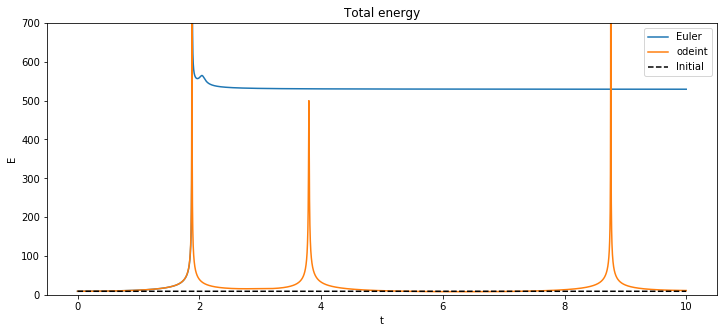

In [88]:
plt.plot(te, energy_e, label='Euler')
plt.plot(to, energy_o, label='odeint')
plt.plot(to, energy_o[0]*np.ones_like(to), 'k--', label='Initial')
plt.legend()
plt.title('Total energy')
plt.xlabel('t')
plt.ylabel('E')
plt.ylim(0, 700);

- Euler is definitely wrong
- Odeint also shows deviations, but relaxes to values much closer to the initial energy
- Odeint solution is graphically consistent with textbook solutions (Gruntz & Waldvogel in Gander & Hřebíček (eds) Problem Solving problems in scientific computing using Maple and MATLAB, Springer-Verlag, 2004, pp 51-72)

## Chutes & Ladders as a Markov Process


### Background

The movement of the walker is a [Markov process](https://en.wikipedia.org/wiki/Markov_process), because the result of a single move depends only on the current position $j$ of the walker and the roll of the die. The entire history, i.e., *how* the walker got to position $j$ does not matter. Such processes are highly relevant in many branches of science and technology. One example of their use in neuroscience is in my PhD thesis ([Plesser, 1999](http://arken.umb.no/~plesser/publications/HEPlesser_PhD.pdf)). We can use techniques for Markov processes to study the movement of the walker in the Chutes & Ladders game.

Instead of obtaining the distribution of times to goal using simulation, we can also obtain it by numerical computation (or, using, e.g. SymPy, even exact). Let ${p^{(k)}}$ be a vector with elements $p^{(k)}_j$ ($0\leq j \leq G$) representing the probability probability that the walker is at position $j$ after move $k$. As initial conditions, we have
\begin{align}
p^{(0)}_0 &= 1\\
p^{(0)}_j &= 0\quad\mathrm{for}\; j>0
\end{align}
Let $M$ be a matrix that describes the how a single move changes the probabilities for the location of the walker. Specifically, let $M_{ij}$ be the probability that a walker in position $j$ will move to position $i$ in the next move. 
Let us first consider a game without chutes and ladders. The walker will then with equal probability move to one of the next six positions, except for the last few positions on the board, where any move will stop at $G$. We therefore have
\begin{align}
M_{0j} &= 0 \qquad\mathrm{(can\,never\,return\,to\,0)} \\
M_{ij} &= 1/6 \quad\mathrm{for}\; j+1\leq i \leq j+6 \;\mathrm{and}\; i < G\\
M_{Gj} &= 0 \quad\mathrm{for}\; j < G-6 \\
M_{Gj} &= 1 - (G-j-1)/6 \quad\mathrm{for}\; G-6 \leq j < G \\
M_{GG} &= 1\\
M_{ij} &= 0 \quad\mathrm{else}
\end{align}

We can then describe the motion of the walker across the board by the following equation:

\begin{equation}
p^{(k+1)} = M \times p^{(k)} \;.
\end{equation}

To obtain the probability distribution for the time to arrive at the goal $G$, we consider $p^{(k)}_G$, which corresponds to the probability that the walker has reached the goal after at most $k$ moves. If $G=6n$, then the goal can at the earliest be reached after $n$ moves (all sixes, probability $(1/6)^n$), and must at the latest be reached after $G$ moves ($G$ ones, probability $(1/6)^G$), i.e.,

\begin{align}
p^{(k)}_G &= 0 \quad\mathrm{for}\; k < n \\
p^{(n)}_G &= (1/6)^n \\
p^{(G)}_G &= 1
\end{align}

These cases provide test cases. Note that $Q_k=p^{(k)}_G$ is the *cumulative*  probability of arrival by step $k$. The probability for arriving *at* step $k$ is 
$$q_k = Q_k - Q_{k-1}\;.$$

Let us now assume that we have a ladder from $r$ to $s$ (chutes work the same way). Then the probability for the walker to move to $r$ will be $0$, and the corresponding probability will be "moved" to $s$. Specifically, based on matrix $M$ from above, we can defined matrix $L$ as follows:
\begin{align}
L_{rj} &= 0 \quad \forall j \qquad\mathrm{(no\,moves\,to\,r)}\\
L_{sj} &= M_{sj} + M_{rj}\quad \forall j \qquad\mathrm{(moves\,to\,s\,instead\,of\,r)}\\
L_{ij} &= M_{ij}\quad\mathrm{else}
\end{align}

### Implementation

We defined $p$ as an array with one column per time point we are interested in, and one row per position. We add some extra columns to ensure all is stationary after $G$ steps and to avoid confusion about which matrix dimension is what.

In [89]:
p = np.zeros((91, 100))
p[0, 0] = 1

In [90]:
M = np.zeros((91, 91))
M[90, 90] = 1
M[90, 84:90] = np.array([1., 2., 3., 4., 5., 6.]) / 6.
for i in range(1, 90):
    M[i, max(0, i-6):i] = 1./6.

In [91]:
for k in range(1, 100):
    p[:, k] = M @ p[:, k-1]

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 120          
plt.rcParams['figure.figsize'] = (12., 6.)

In [93]:
plt.matshow(M);
plt.xlabel('Current board position $j$');
plt.ylabel('Next board position $i$');
plt.title('Transistion matrix for plain board');
ax = plt.colorbar(shrink=0.7);

- The broad band slighly below the diagonal represents normal moves.
- Accumulation of probability in position $G=90$ is visible in the bottom right corner.

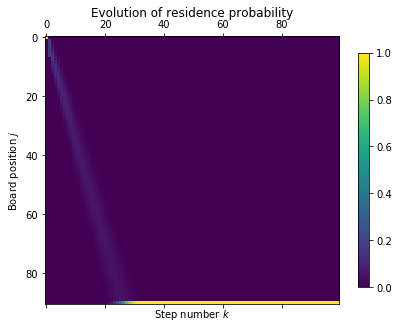

In [94]:
plt.matshow(p)
plt.xlabel('Step number $k$');
plt.ylabel('Board position $j$');
plt.title('Evolution of residence probability');
ax = plt.colorbar(shrink=0.7);

#### Improving the figures

- Graphs are a bit difficult to read due to low contrast
- We define a function providing nice plotting
- For details, see the end of this notebook

In [97]:
import matplotlib.cm as cm

def prettymat(m):
    cm7 = cm.get_cmap('YlGnBu_r', 7)
    cm7list = [cm7(i) for i in range(cm7.N)]
    cm7list[0] = [0.9, 0.9, 0.9]
    cm7mod = cm7.from_list('mymap', cm7list, cm7.N)
    plt.matshow(m, cmap=cm7mod)
    cax = plt.colorbar(shrink=0.7);
    cax.set_ticks(np.arange(0., 7.) / 7. + 1./14.);
    cax.set_ticklabels(('0', '1/6', '1/3', '1/2', '2/3', '5/6', '1'));
    plt.xlabel('Current board position $j$');
    plt.ylabel('Next board position $i$');
    plt.title('Transistion matrix for plain board');

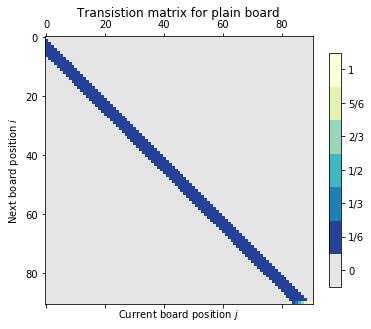

In [98]:
prettymat(M);

In [99]:
from matplotlib.colors import PowerNorm

def prettyprob(p):
    p_cutoff = 0.001
    cm_p = cm.get_cmap('YlGnBu_r')
    plt.matshow(p, cmap=cm_p,
               norm=PowerNorm(gamma=0.2, vmin=p_cutoff, vmax=1))
    plt.xlabel('Step number $k$');
    plt.ylabel('Board position $j$');
    plt.title('Evolution of residence probability');
    cax = plt.colorbar(shrink=0.8, extend='min');
    cax.set_ticks([0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]);

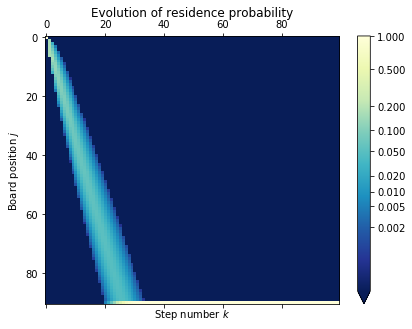

In [100]:
prettyprob(p)

#### Arrival time probabilities

In [101]:
Q = p[90, :]
q = np.zeros_like(Q)   # fiddle a little to avoid zero-indexing trouble
q[1:] = np.diff(Q)

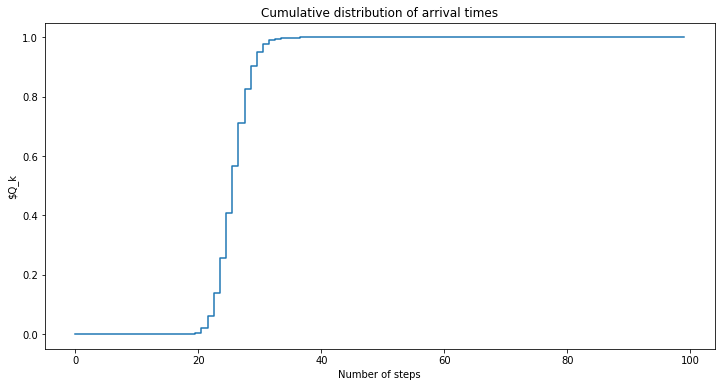

In [102]:
plt.step(range(100), Q, where='mid');
plt.title('Cumulative distribution of arrival times')
plt.xlabel('Number of steps');
plt.ylabel('$Q_k');

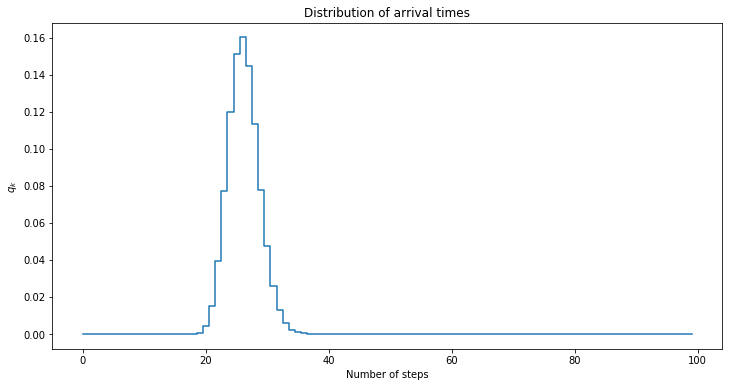

In [103]:
plt.step(range(100), q, where='mid');
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps');
plt.ylabel('$q_k$');

Let's check the border cases

In [104]:
Q[14], Q[15], (1./6.)**15, Q[15]-(1./6.)**15

(0.0, 2.126822490730477e-12, 2.126822490730477e-12, 0.0)

In [105]:
q[15]

2.126822490730477e-12

In [106]:
q[90]

0.0

In [107]:
Q[89]-1, Q[90]-1

(-1.4432899320127035e-15, -1.4432899320127035e-15)

In [108]:
(1./6.)**90

9.255235320869914e-71

Okay, probabilities for long game durations are far below numerical precision, therefore we do not see exact values in the tail of the distribution. But the error of $\mathcal{O}(10^{-15})$ is acceptable.

#### Matrix with chutes and ladders

We first define the standard set of chutes and ladders.

In [109]:
cnl = [(1, 40), (8, 10), (36, 52), (43, 62), (49, 79), (65, 82), (68, 85)] + \
      [(24, 5), (33, 3), (42, 30), (56, 37), (64, 27), (74, 12), (87, 70)]

In [110]:
L = M.copy()
for start, dest in cnl:
    L[start, :] = 0.
    L[dest, :] += M[start, :]

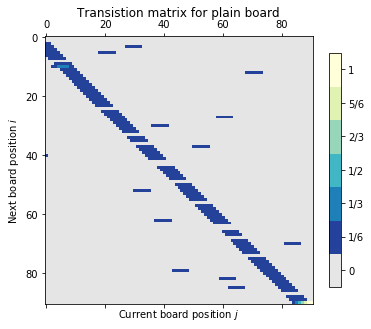

In [111]:
prettymat(L)

- The broad band slighly below the diagonal represents normal moves.
- Stripes above the diagonal represent chutes.
- Stripes below the broad band represent ladders.
- The bright blue bar in the top-left corner is the $8\to 10$ ladder which is so short it overlaps with normal movement.
- The $1	\to 40$ ladder is visible as a single bright blue pixel on row 40.
- Accumulation of probability in position $G=90$ is visible in the bottom right corner.

In [112]:
pL = np.zeros((91, 300))
pL[0, 0] = 1
for k in range(1, pL.shape[1]):
    pL[:, k] = np.dot(L, pL[:, k-1])

In [113]:
QL = pL[90]
qL = np.zeros_like(QL)
qL[1:] = np.diff(QL)

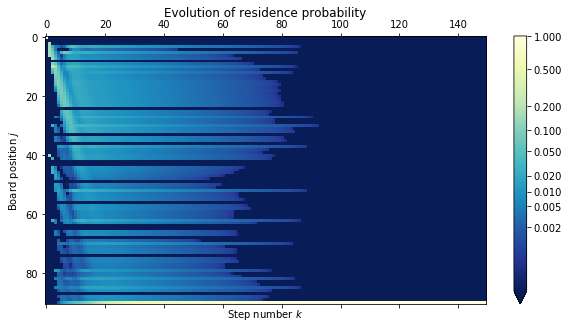

In [114]:
prettyprob(pL[:, :150])

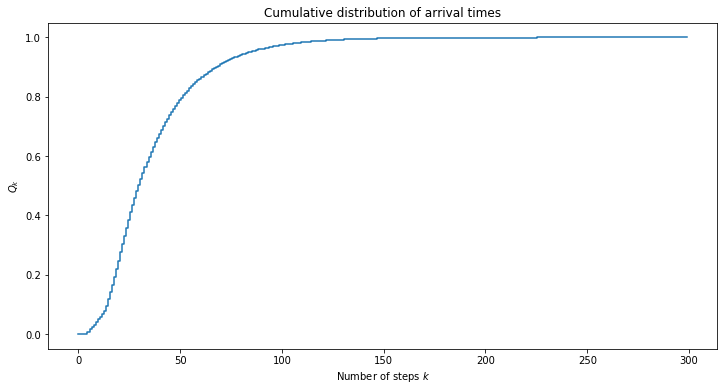

In [115]:
plt.step(range(len(QL)), QL, where='mid');
plt.title('Cumulative distribution of arrival times')
plt.xlabel('Number of steps $k$');
plt.ylabel('$Q_k$');

In [116]:
plt.step(range(len(qL)), qL, where='mid');
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps $k$');
plt.ylabel('$q_k$');

We know that the shortest path is 4 steps, requiring a precise sequence of die casts, i.e., it has probability $6^{-4}$. We can check this:

In [117]:
print("No one should make it in three moves                   :", qL[3])
print("It is possible to make it in four moves                :", qL[4])
print("If there is a single way to do it four moves, we expect:", (1./6.)**4)
print("If there are two ways to do it in four moves, we expect:", 2 * (1./6.)**4)
print("Difference between results and two-ways expectation    :", qL[4] - 2 * (1./6.)**4)

No one should make it in three moves                   : 0.0
It is possible to make it in four moves                : 0.0015432098765432098
If there is a single way to do it four moves, we expect: 0.0007716049382716048
If there are two ways to do it in four moves, we expect: 0.0015432098765432096
Difference between results and two-ways expectation    : 2.168404344971009e-19


So apparently there are two ways to do it in four steps. Inspection of the board reveals the following possibilities:

1. Roll 1, then take ladder from 1 to 40.
1. Roll 3, then take ladder from 43 to 62.
1. Roll 6, then take ladder from 68 to 85.
1. From 85, you can reach 90 by either rolling 5 or 6.

Therefore, there are indeed exactly two ways of reaching the goal with four moves.

Furthermore, we can check that $Q_k	\to 1$ for $k	\to\infty$:

In [118]:
1 - QL[-1]

5.4451593992643765e-06

This indicates convergence to $1$, but at the same time a rather long tail. We can plot semilogarithmically to see the tail better:

In [119]:
plt.step(range(len(qL)), qL, where='mid');
plt.yscale('log')
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps $k$');
plt.ylabel('$q_k$');

The tail of the distribution is linear in the semilogarithmic plot, indicating that it follows an exponential distribution. For more detailed characterization, we could fit the distribution for $k>50$ to an exponential distribution; we leave this as an exercise.

#### Comparison with simulation

In [120]:
import sys
sys.path.insert(0, '../../Exercises/pa01_project/')
from chutes import multi_game_experiment

In [121]:
d = multi_game_experiment(num_games=20000, num_players=1, seed=1234567)

In [122]:
qE = np.zeros(max(d)+1, dtype=float)
for n in frozenset(d):
    qE[n] = d.count(n)
qE /= len(d)

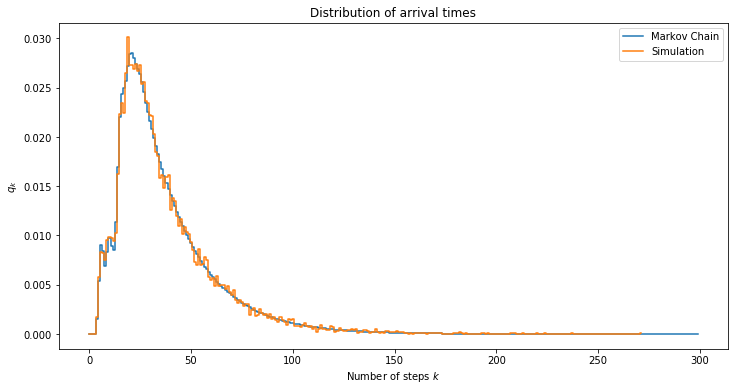

In [123]:
plt.step(range(len(qL)), qL, where='mid', label='Markov Chain');
plt.step(range(len(qE)), qE, where='mid', label='Simulation');
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps $k$');
plt.ylabel('$q_k$');
plt.legend();

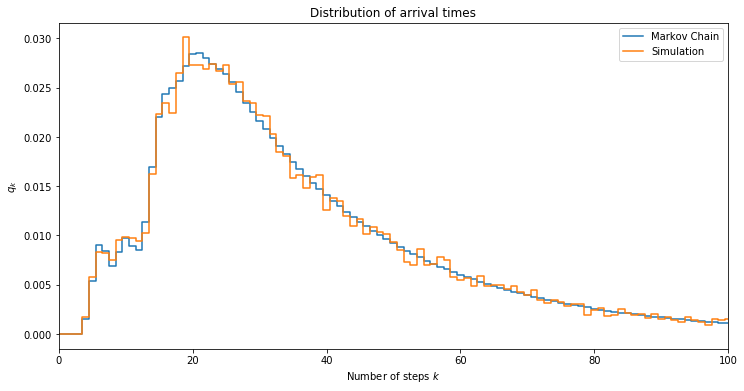

In [124]:
plt.step(range(len(qL)), qL, where='mid', label='Markov Chain');
plt.step(range(len(qE)), qE, where='mid', label='Simulation');
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps $k$');
plt.ylabel('$q_k$')
plt.xlim(0, 100)
plt.legend();

Markov chain analysis and simulation are apparently in good agreement. This qualitative statement based on visual inspection (which may be misleading) should be substantiated by a proper statistical test, cf *Extensions* below.

#### Games with multiple players

In order to find the distribution of the arrival time for the first of $N$ (identical) players in a game, we can use results from [order statistics](http://en.wikipedia.org/wiki/Order_statistic). If $T_n$ is the random variable representing the arrival time of walker $n$, then we are interested in the distribution of $\min \{T_1, T_2, ..., T_N\}$, where all $T_n$ are independently and identically distributed according to the discrete distribution $q_k$. From [David and Nagaraja (1992, Eq 2.1.3)](http://books.google.no/books?id=bdhzFXg6xFkC&dq=Arnold,+B.+C.,+N.+Balakrishnan,+H.+N.+Nagaraja.+1992.+A+First+Course+in+Order+Statistics.+Wiley,+New+York.&hl=no&source=gbs_navlinks_s), we obtain the cumulative distribution of the minimum of $N$ random variables i.i.d. with cumulative distribution $Q_k$ as
$$R^{(N)}_k = 1 - ( 1 - Q_k )^N$$
and the corresponding distribution as
$$r^{(N)}_k = R^{(N)}_k - R^{(N)}_{k-1}\;.$$
See also [Evans et al (2006)](http://www.math.wm.edu/~leemis/2006informsjoc.pdf).

We consider a game with four players.

In [125]:
N = 4
RL = 1 - (1 - QL)**N
rL = np.zeros_like(RL)   # fiddle a little to avoid zero-indexing trouble
rL[1:] = np.diff(RL)

In [126]:
dN = multi_game_experiment(num_games=20000, num_players=4, seed=1234567)
rE = np.zeros(max(dN)+1, dtype=float)
for n in frozenset(dN):
    rE[n] = dN.count(n)
rE /= len(dN)

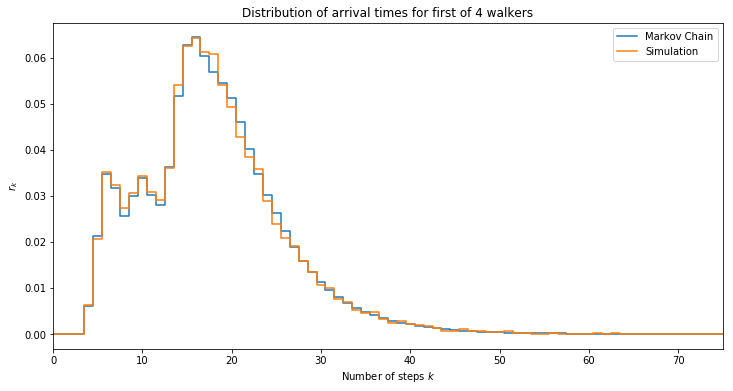

In [127]:
plt.step(range(len(rL)), rL, where='mid', label='Markov Chain');
plt.step(range(len(rE)), rE, where='mid', label='Simulation');
plt.title('Distribution of arrival times for first of {:d} walkers'.format(N))
plt.xlabel('Number of steps $k$');
plt.ylabel('$r_k$');
plt.legend();
plt.xlim(0, 75);

Also in this case theory and simulation appear to agree very well; see *Extensions* below for a note on statistical tests for distributions. As a sanity check, we check that no-one arrived in fewer than four moves, and that $R_k^{(4)}	\to1$ for $k	\to\infty$:

In [128]:
print(RL[3], RL[4])
print(1 - RL[-1])

0.0 0.006158565220760082
0.0


### Extensions

#### Statistical tests for distributions
Above, we compared distributions obtained numerically by Markov chain analysis with distributions obtained from simulations by visual inspection. While this is a useful first step (*always* look at your data before applying statistical analysis!), it may also be misleading. To draw solid conclusions, we need to apply statistical tests to check whether the simulation results follow the distribution obtained from Markov chain analysis.

For continuous random variables, e.g., variables following a Gaussian or exponential distribution, the proper test is the [Kolmogorov-Smirnov test](http://itl.nist.gov/div898/handbook/eda/section3/eda35g.htm), which is available as [`scipy.stats.kstest`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html).

The distribution of game durations, though, is a discrete distribution and we need to apply the [$\chi^2$-test](http://itl.nist.gov/div898/handbook/eda/section3/eda35f.htm), which is available as [`scipy.stats.chisquare`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html). In this test, we compare the number of times each game duration has been observed with the number predicted, $n_k=q_k\times N$, where $N$ is then number of games played. To be valid, the $\chi^2$-test requires that $n_k >5\; \forall k$. In order to ensure that this is fulfilled, we proceed as follows:

1. Find $k_{\mathrm{max}}$, the game duration for with highest probability $q_k$. The distribution for $k>k_{\mathrm{max}}$ is essentially the tail of the distribution, while the part $k<k_{\mathrm{max}}$ is the interesting part.
1. Find $k_{\mathrm{min}} < k_{\mathrm{max}}$, the game duration for which $q_k$ is smallest (but non-zero), to the left of the maximum.
1. Choose $N$ so that $N\times q_{k_{\mathrm{min}}}>5$.
1. Find $k_{\mathrm{tail}}$ as the largest $k$ for which both of the following conditions are fulfilled:

    1. $N\times q_k>5$
    1. $(1-Q_k)\times N>5$

   Condition A. ensures that the expectation for the rightmost bin, $k_{\mathrm{tail}}$ is more than 5, while B. ensures that the remaining tail, which we will collapse into a single bin, also has an expectation of at least 5.
1. Simulate $N$ games.
1. Each game duration $k$ forms one *bin* for the $\chi^2$-test, except that all game durations $k>k_{\mathrm{tail}}$ are combined in a single bin. The expectation for this bin is $n_{\mathrm{tail}}=(1-Q_{k_\mathrm{tail}})\times N$.
1. Apply the $\chi^2$-test to the data.

#### Modeling players with internal state
In order to treat players with internal state, such as resilient players (take extra step(s) after sliding down) or lazy players (take fewer step(s) after climbing up), we need to split every element of vector $p$ into two: one representing the probability of being in normal, and on of being in special mode at a given location. Matrices $M$ and $L$ then have twice as many rows and columns and become more complicated, although the design approach is the same.

#### Using sparse matrices
For very large matrices, it may be useful to consider *sparse matrix* implementations from SciPy, which do not store all the zeros elements in $M$ and $L$.

### Using more suitable color maps

- The color maps we used above were not optimal due to limited contrast
- We will look at better color maps here
- We first define functions to
    - create a propagator matrix M for a given game board
    - evolve the state of the game over time
    - extract the arrival-time distribution

In [129]:
def propagator(ladders=None, chutes=None, goal=90):
    ladders = ladders if ladders is not None else [(1, 40), (8, 10), (36, 52), 
                                                   (43, 62), (49, 79), (65, 82), 
                                                   (68, 85)] 
    chutes = chutes if chutes is not None else [(24, 5), (33, 3), (42, 30), 
                                                (56, 37), (64, 27), (74, 12), 
                                                (87, 70)]
    
    M = np.zeros((goal+1, goal+1))
    M[goal, goal] = 1
    M[goal, (goal-6):goal] = np.array([1., 2., 3., 4., 5., 6.]) / 6.
    for i in range(1, goal):
        M[i, max(0, i-6):i] = 1./6.
        
    L = M.copy()
    for start, dest in chutes + ladders:
        L[start, :] = 0.
        L[dest, :] += M[start, :]
        
    return L

In [130]:
def evolve(prop, num_moves, initial=None):
    r, c = prop.shape
    assert r == c, "Propagator must be square"
    if initial is None:
        initial = np.zeros(r)
        initial[0] = 1
    else:
        assert len(initial) == r, "Initial size wrong"
    
    p = np.zeros((r, num_moves+1))
    p[:, 0] = initial
    
    for k in range(1, num_moves+1):
        p[:, k] = np.dot(prop, p[:, k-1])
        
    return p    

In [131]:
def arrival_dist(p_evol):
    Q = p_evol[-1, :]
    q = np.zeros_like(Q)
    q[1:] = np.diff(Q)
    return q, Q

#### Propagator matrix—standard color map

In [132]:
prop90 = propagator()

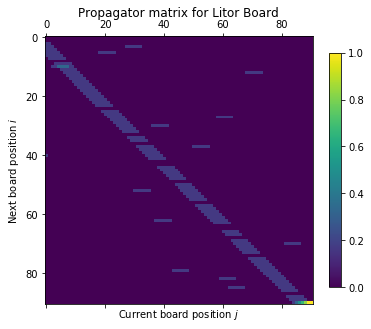

In [133]:
plt.matshow(prop90)
plt.xlabel('Current board position $j$');
plt.ylabel('Next board position $i$');
plt.title('Propagator matrix for Litor Board');
plt.colorbar(shrink=0.7);

- Problems with the figure above: 
    - all values in the matrix are either 0 or a multiple of 1/6
    - this is not clear from the color scale
    - actual values are difficult to read off
    - color scale is not linear in any sense
- Solution: Alternative color map
    - See [Choosing colormaps](http://matplotlib.org/users/colormaps.html) and [Colormaps reference](http://matplotlib.org/examples/color/colormaps_reference.html)
    - See also [this presentation on the default colormap in Matplotlib 2.0](https://bids.github.io/colormap/)
- Some of the examples below are based on ideas from
    - http://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar
    - http://pyhogs.github.io/colormap-examples.html

##### Step 1: Use a perceptually uniform color map

- Lightness changes uniformly over range of color map
- The `_r` suffix on the name reverses the color map, so that 0 is darkest
- For clarity, we use a small matrix and drop axis decorations

In [134]:
import matplotlib.cm as cm

In [135]:
propsmall = propagator(ladders=[(3, 5), (10, 15)], chutes=[(7, 2), (16, 12)], goal=20)

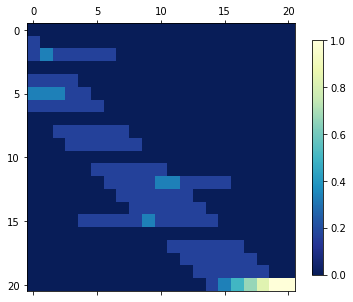

In [136]:
plt.matshow(propsmall, cmap=cm.YlGnBu_r)
plt.colorbar(shrink=0.7);

##### Step 2: Discrete color map with values 0, 1/6, 2/6, ..., 1

- Seven different colors needed
- We can just get a color map with the necessary number of levels

In [137]:
cm7 = cm.get_cmap('YlGnBu_r', 7)
plt.matshow(propsmall, cmap=cm7)
plt.colorbar(shrink=0.7);

- The axis label are now not very helpful
- We can change the placement of the labels

In [138]:
cm7 = cm.get_cmap('YlGnBu_r', 7)
plt.matshow(propsmall, cmap=cm7)
cax = plt.colorbar(shrink=0.7);
cax.set_ticks(np.linspace(0, 1, 7));

- Better, but it would be even nicer to place the markers in the center of the boxes and show fractions
- For $n$ boxes, the box centers are placed at

$$y_k = \frac{1}{2n} + \frac{k}{n} \quad k = 0, 1, \dots, n-1$$

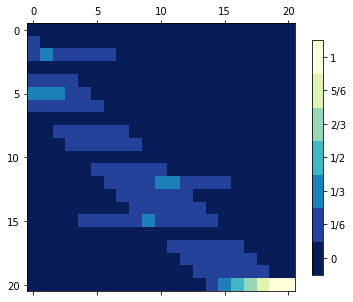

In [139]:
cm7 = cm.get_cmap('YlGnBu_r', 7)
plt.matshow(propsmall, cmap=cm7)
cax = plt.colorbar(shrink=0.7);
cax.set_ticks(np.arange(0., 7.) / 7. + 1./14.);
cax.set_ticklabels(('0', '1/6', '1/3', '1/2', '2/3', '5/6', '1'));

##### Step 3: change representation of zero probability for better contrast

In [140]:
cm7 = cm.get_cmap('YlGnBu_r', 7)
cm7list = [cm7(i) for i in range(cm7.N)]
cm7list[0] = [0.9, 0.9, 0.9]
cm7mod = cm7.from_list('mymap', cm7list, cm7.N)
plt.matshow(propsmall, cmap=cm7mod)
cax = plt.colorbar(shrink=0.7);
cax.set_ticks(np.arange(0., 7.) / 7. + 1./14.);
cax.set_ticklabels(('0', '1/6', '1/3', '1/2', '2/3', '5/6', '1'));

#### Time evolution of residence probability

- We will use a similar color map as above for the time evolution, but with full resolution
- We will mark values below a certain limit with a separat color

In [141]:
p90 = evolve(prop90, 200)

In [142]:
p_cutoff = 0.005

cm_p = cm.get_cmap('YlGnBu_r')
cm_p.set_under((0.95,0.95, 0.95))
plt.matshow(p90[:, :100], cmap=cm_p, vmin=p_cutoff)
plt.xlabel('Step number $k$');
plt.ylabel('Board position $j$');
plt.title('Evolution of residence probability');
cax = plt.colorbar(shrink=0.7, extend='min');
cax.set_ticks([p_cutoff] + list(np.arange(0.1, 1.01, 0.1)));

##### Step 4: Zooming in on parts of the color scale

- We can use different normalizations for the color scale to make important parts of the figure more visible
- Here, we use a power norm $x^\gamma$

In [143]:
from matplotlib.colors import PowerNorm

In [144]:
p_cutoff = 0.001
cm_p = cm.get_cmap('YlGnBu_r')
plt.matshow(p90[:, :100], cmap=cm_p,
           norm=PowerNorm(gamma=0.2, vmin=p_cutoff, vmax=1))
plt.xlabel('Step number $k$');
plt.ylabel('Board position $j$');
plt.title('Evolution of residence probability');
cax = plt.colorbar(shrink=0.8, extend='min');
cax.set_ticks([0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]);

- Note that we cannot include the cutoff value itself in the xtick values: this leads to an error in `cax.set_xticks()`.